In [126]:
import networkx as nx
import matplotlib.pyplot as plt

In [115]:
def edge_to_remove(graph):
    dict1=nx.edge_betweenness_centrality(graph)
    
    #sort the edges according to the betweenness values
    list_of_tuples=dict1.items()
    list_of_tuples=sorted(list_of_tuples,key=lambda x:x[1],reverse=True)
    return list_of_tuples[0][0]
    

In [116]:
def girvan_newman_scratch(graph):
    c=list(nx.connected_component_subgraphs(graph)) #returns the subgraphs
    #if len of c is 1 then graph is connected else it has more than one connected component
    l=len(c)
    print('The Number of connected components are:',l)
    
    
    while(l==1):
        graph.remove_edge(*edge_to_remove(graph))
        c=list(nx.connected_component_subgraphs(graph))
        l=len(c)
        print('The Number of connected components are:',l)
    return c

In [117]:
def create_subgraph(graph,min_degree):
    newgraph=graph.copy()
    rem_nodes=[node for (node,val) in newgraph.degree() if val<min_degree]
    newgraph.remove_nodes_from(rem_nodes)
    return newgraph

In [168]:
def community_layout(graph,clusters):
    color = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'w'}
    pos=nx.spring_layout(graph)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    cnt=0.
    
    for i in clusters:
        cnt=cnt+1.
        list_of_nodes=i.nodes()
        size=float(len(i.nodes()))
        nx.draw_networkx_nodes(graph,pos,list_of_nodes,node_size=20,node_color=color[cnt-1],with_labels=False)
    nx.draw_networkx_edges(graph,pos,alpha=0.3)
    plt.show()
    

In [122]:
graph=nx.read_edgelist('edges.txt',delimiter='\t')
print('The Number of edges are',graph.order(),'and the number of nodes',graph.number_of_edges())

The Number of edges are 5062 and the number of nodes 6060


In [123]:
#Try Community detection alogrithm 
#1.Get the subgraph
subgraph=create_subgraph(graph,2)
print('Number of nodes subgraph',subgraph.order(),'Number of edges',subgraph.number_of_edges())




Number of nodes subgraph 712 Number of edges 1710


In [124]:
#3. Girvan Newman from scratch
clusters=girvan_newman_scratch(subgraph)



The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components are: 1
The Number of connected components

In [125]:
#print the nodes falling in the community
for i in clusters:
    print(len(i.nodes()))
    print('----')

658
----
54
----


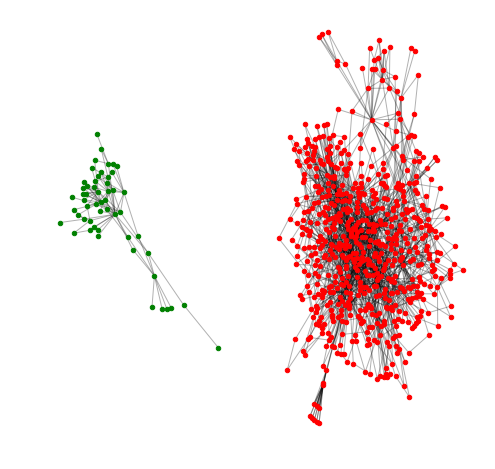

In [169]:
#community layout
positions=community_layout(subgraph,clusters)